###농어의 무게를 예측하라
  - 회귀(regression)
  - 이진분류(logistic regression)

### K-최근접 이웃 회귀

In [9]:
import matplotlib.pyplot as plt
import numpy as np


perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


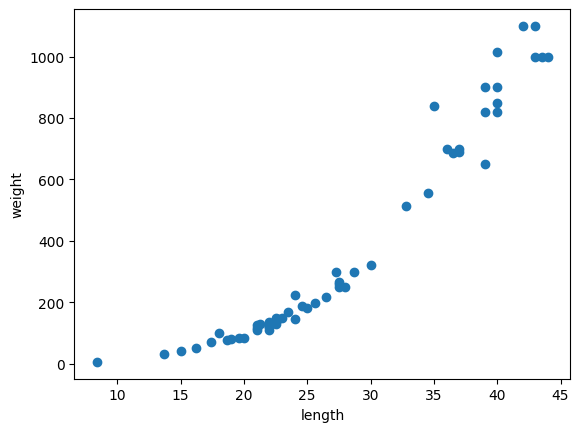

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 세트 준비

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input)
print(train_target)
print(test_input)
print(test_target)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

train_input = train_input.reshape(-1, 1)  ## sklearn 을 이용해서 모델을 돌리기 위해서는 2차원의 배열에 맞춰야 되기 때문에 데이터 형식을 조정한다.
test_input = test_input.reshape(-1, 1)

print(train_input)
print(test_input)
print(train_input.shape)
print(test_input.shape)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]
(42,)
(42,)
(14,)
(14,)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5

### 회귀 모델 훈련

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)  ## k - 최근접 이웃 알고리즘의 score 함수는 R스퀘어 값을 의미한다.

0.992809406101064

R^2 = 1 - [(타킷 - 예측)^2 의합] / [(타킷 - 평균)^2 의 합]

In [13]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)  ## K- 최근접 이웃 알고리즘의 mean_absolute_error 함수는 말그대로 mae를 의미한다.
print(mae)

19.157142857142862


## 과대적합과 과소적합

  - 과소적합(underfitting) : 테스트 데이터의 적합도가 훈련데이터 보다 높게 나왔을 때
    - 테스트 세트의 적합도가 높은것은 우연히 맞췄을 가능성이 높기 때문에 좋을 것이 없다. 따라서 과소적합에서도 훈련데이터의 적합도가 테스트 데이터의 적합도 보다 약간 높을 정도로 하이퍼 파라미터를 조정해준다.
  - 과대적합(overfitting) : 훈련 데이터에서만 적합도가 높고 테스트 데이터에서 적합도가 형편없을때

In [14]:
knr.score(train_input, train_target)   ## 과소적합(underfitting) : 테스트 데이터의 적합도가 훈련데이터 보다 높게 나왔을 때

0.9698823289099254

In [16]:
knr.score(test_input, test_target)

0.992809406101064

## 이웃 개수 줄이기

  - 과대적합을 줄이기 위해서 이웃의 개수를 늘리고  =  이웃의 개수가 적으면 과대적합이 발생한다.
  - 과소적합을 줄이기 위해서는 이웃의 개수를 줄인다  = 이웃의 개수가 많으면 과소적합이 발생한다.

  - 이러한 K-최근접 이웃 알고리즘에서의 "이웃의 개수" 같은 파라미터를 하이퍼 파라미터라고 한다.
  - 하이퍼 파라미터란 모델의 성능에 있어서 중요한 키 역할을 하는 파라미터를 의미한다.

In [17]:
knr.n_neighbors = 3  ## default 값은 =5

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target) )


0.9804899950518966


In [18]:
print(knr.score(test_input, test_target))

0.9746459963987609


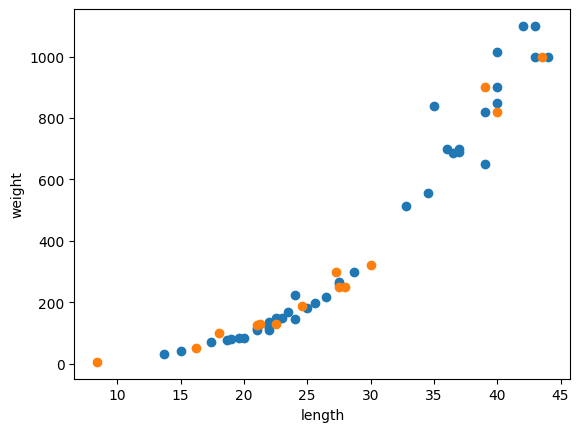

In [19]:
# 시각화
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()